In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

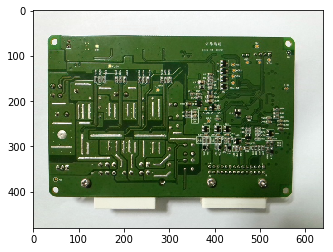

In [4]:
image_path = 'source_image/1560434627.jpg'
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## PCB区域提取
### 一、基于颜色饱和度直方图对图片进行裁剪
在计算机中最常用的彩色图像模型是RGB模型，该模型通过每种颜色在红、绿、蓝三原色光谱分量中的投影值，来确定其在颜色空间中的坐标位置。使用RGB模型可以很方便地在计算机中描述一幅彩色图像的颜色信息，但是这并不是人眼直观感知物体颜色的方式，人眼往往从色调、饱和度以及亮度这三个方面来感知物体的颜色。色调描述的是一种纯色的颜色属性，饱和度描述的是一种纯色被白光稀释的程度，计算机中的HSV彩色模型便采用了该方式对彩色图片进行描述。因此HSV模型是开发基于色彩描述的图像处理算法的理想工具，PCB区域提取算法也是在HSV模型下设计的。  
而我们通过相机采集得到的原始图像是RGB格式的，因此在图像处理阶段，需要先RGB模型到HSV模型的转换，该转换是基于图像的每一像素单独进行的，转换方式如下所示：  
**H分量：**
\begin{equation}
H=
\begin{cases}
\begin{aligned}
\theta, \quad &B\le G\\
360-\theta, \quad&B>G
\end{aligned}
\end{cases},\quad
其中：
\theta=arccos\{ \frac {\frac 12 [(R-B)+(R-G)]}{[(R-G)^2+(R-B)(G-B)]^{1/2}} \}
\end{equation}
**S分量：**
\begin{equation}
S=1- \frac 3{R+G+B}[min(R, G, B)]
\end{equation}
**V分量：**
\begin{equation}
V=\frac 13(R+G+B)
\end{equation}

[None]


Text(0.5, 1.0, 'source image')

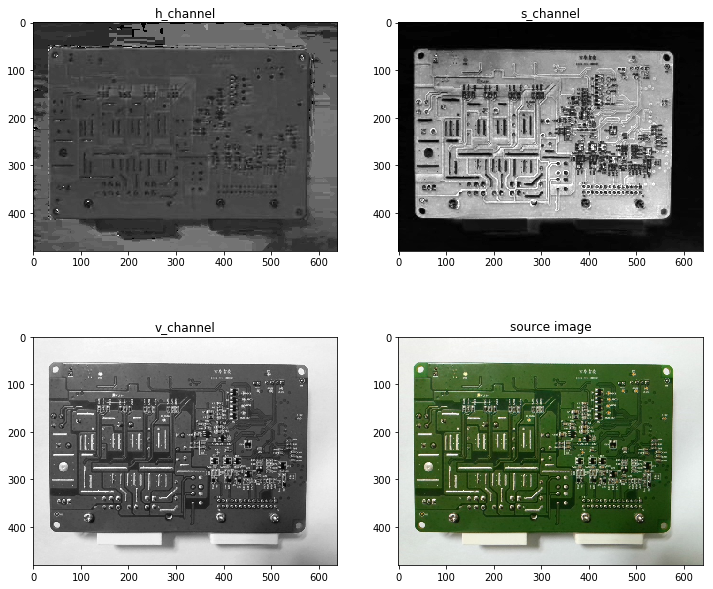

In [53]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
fig, axes = plt.subplots(2, 2)
print(plt.setp(fig, size_inches=[12, 10]))
plt.subplots_adjust(top=0.9, bottom=0.1,wspace=0.2, hspace=0.2)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
axes[0][0].imshow(hsv_image[..., 0], cmap='gray')
axes[0][0].set_title("h_channel")
axes[0][1].imshow(hsv_image[..., 1], cmap='gray')
axes[0][1].set_title("s_channel")
axes[1][0].imshow(hsv_image[..., 2], cmap='gray')
axes[1][0].set_title("v_channel")
axes[1][1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1][1].set_title("source image")

In [55]:
s_image = hsv_image[..., 1]

**高斯滤波**
$$
\frac 1{{2\pi}\sigma^2}e^{-\frac {(x-\bar{x})^2 + {(y-\bar{y})^2}}{2\sigma ^2}}
$$

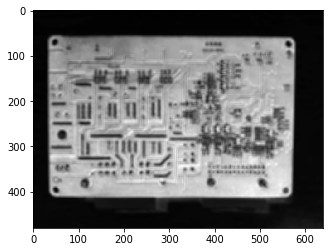

In [62]:
gauss_image = cv2.GaussianBlur(s_image, ksize=(7, 7), sigmaX=15, sigmaY=15)
plt.imshow(gauss_image, cmap='gray')

**双边滤波**

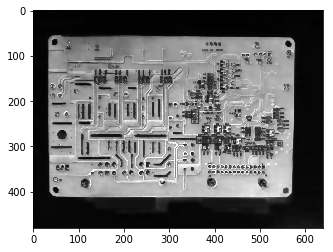

In [70]:
bilater_image = cv2.bilateralFilter(s_image, 10, 20, 30)
plt.imshow(bilater_image, cmap='gray')

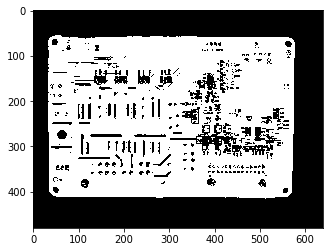

In [72]:
thresh, thresh_image = cv2.threshold(bilater_image, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thresh_image, cmap='gray')